# K Nearest Neighbor

KNN can be used for classification problems. It falls in the supervised learning family of algorithms.

### Steps:

1. Choose number of neighbors (K)

2. Consider K nearest neighbors of new data point and choose the distance metrics

3. Amongst these K neighbors, count the number of data points for each category

4. Assign the new data point to the most frequent neighboring category (most common category)

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing from sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

/Users/Kshitij/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading the iris data

dataset = pd.read_csv('iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Summarizing the data set
dataset.shape

(150, 6)

In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


---

### Data Preprocessing

In [6]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#Dividing data into features (Independent variables) and labels (Target / Dependent Variable)
#Removing the id columns as it is not significant 

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [8]:
#Label Encoding

#As labels (Species) are categorical, we need to convert it to numbers. For conversion, we are using Label Encoding

#Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [9]:
#Transforming Y variable

le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---

### Building KNN Model

In [11]:
#Splitting data set into training and testing (80% Training)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Random_state is used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you will get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [12]:
#Building a basic KNN model with K = 3

# First learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

---

### Model Evaluation

In [13]:
#Accuracy of our model

accuracy = accuracy_score(y_test, y_pred)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 96.67%


In [14]:
#Confusion Matrix for variables with 3 labels

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


---

### Cross Validation

- Trying different K values from 1 till 49
- Choosing the best K value for the given model based on the accuracy obtained

In [15]:
# creating a list of K for KNN
#The model will consider K values from 1 till 49 with an interval of 2 (All odd numbers from 1 till 49)
k_list = list(range(1,50,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

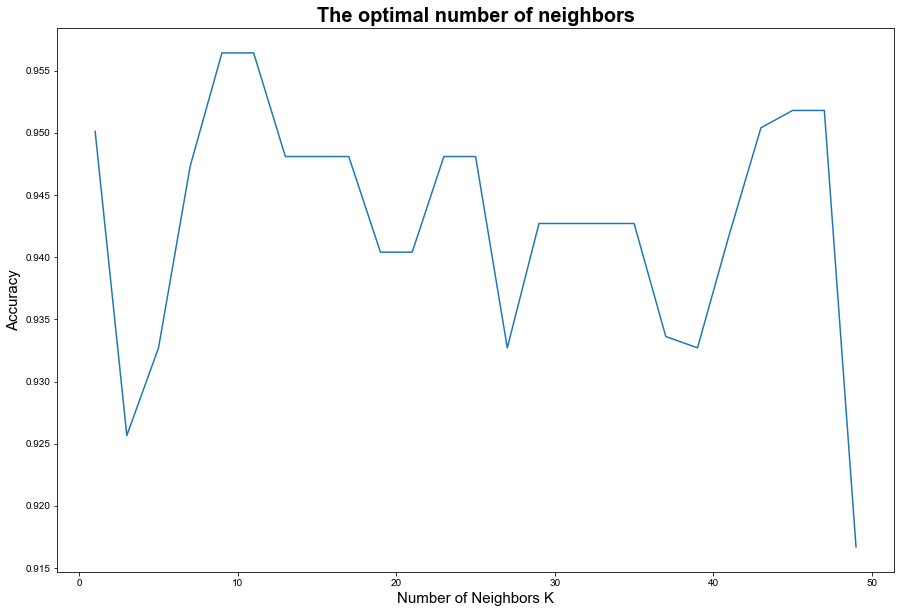

In [16]:
# Plotting average Misclassification Error for all number of neighbors

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

---

### Misclassification Error

In [17]:
### Another evaluation metrics - Misclassification error (1 - Accuracy)

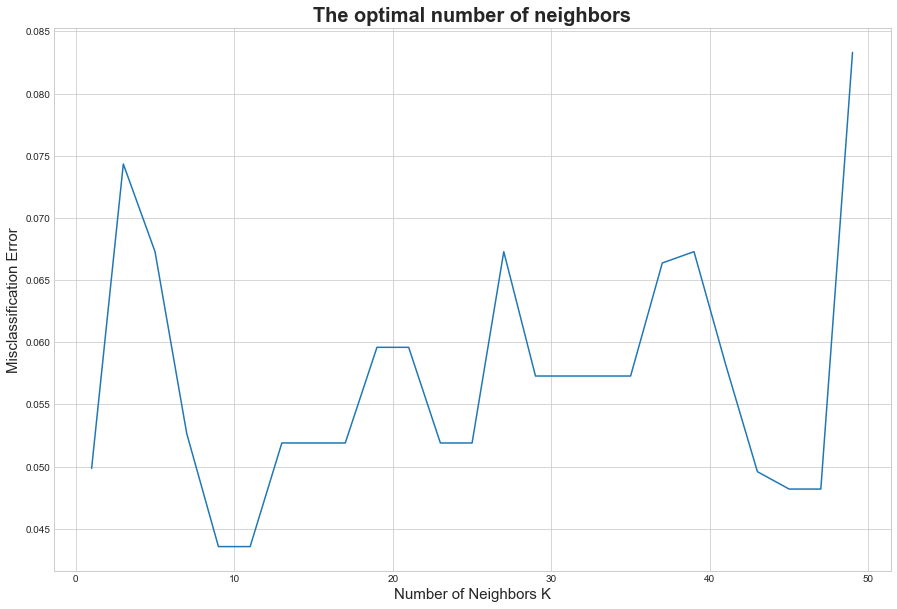

In [18]:
# Plotting average Misclassification Error for all number of neighbors

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, MSE)
plt.show()

In [19]:
# The optimal value of K is 9 as the misclassification error is the lowest / accuracy is highest.